# Clean all pieces of data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score

## First, download the data (this time, without the Inglehart Welzel indexes)

In [2]:
GPI = pd.read_excel('global peace index.xlsx')

In [3]:
EF = pd.read_csv('eco footprint.csv')

In [4]:
EI = pd.read_excel('educationindex.xlsx')

In [5]:
GDP = pd.read_excel('GDP nominal.xlsx')

In [6]:
gini = pd.read_csv('Gini.csv')

In [7]:
LE = pd.read_excel('life expectancy at birth.xlsx')

In [8]:
WHR = pd.read_csv('world happiness ranking.csv')

## Let's standarize the country names

In [9]:
# We take the dictionary and list of corrections

to_substitute ={'Yemen, Rep.': 'Yemen', 'Palestinian National Authority': 'Palestine', 'West Bank and Gaza':'Palestine',
            'Venezuela, RB':'Venezuela', 'United States': 'United States of America', 'USA': 'United States of America',
            'Trinidad':'Trinidad and Tobago', 'The Gambia':'Gambia', 'São Tomé and Príncipe': 'São Tomé and Principe',
            'Sao Tome and Principe': 'São Tomé and Principe', 'Syrian Arab Republic': 'Syria', 'St. Lucia': 'Saint Lucia',
            'St. Kitts and Nevis': 'Saint Kitts and Nevis', 'Slovak Republic':'Slovakia', 'Singapo':'Singapore',
            'Russian Federation': 'Russia', 'Republic of the Congo':'Congo', 'Philipines':'Philippines',
            'Phillipines':'Philippines', 'Macedonia (FYR) ': 'Macedonia', 'Lao PDR': 'Laos', 'Kyrgyz Republic': 'Kyrgyzstan',
            'Kyrgyzistan': 'Kyrgyzstan', "Korea, Dem. People's Rep.":'North Korea', 'Korea, Rep.': 'South Korea',
            "Côte d'Ivoire":'Ivory Coast', "Cote d' Ivoire": 'Ivory Coast', 'Iran, Islamic Rep.': 'Iran',
            'Hong Kong SAR, China': 'Hong Kong', 'Gambia, The': 'Gambia', 'Egypt, Arab Rep.': 'Egypt',
            'DR Congo': 'Democratic Republic of the Congo', 'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
            'Congo, Rep.': 'Congo', 'Czech':'Czech Republic', 'Curacao': 'Curaçao', 'Cape Verde': 'Cabo Verde',
            'Brunei Darussalam': 'Brunei', 'Bosnia': 'Bosnia and Herzegovina', 'Bahamas, The': 'Bahamas'}

to_drop = ['World', 'Western Sahara', 'Wallis and Futuna', 'Virgin Islands (U.S.)', 'Upper middle income',
        'United States Virgin Islands', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD)',
        'Sub-Saharan Africa (excluding high income)', 'St. Martin (French part)', 'South Asia', 'South Asia (IDA & IBRD)',
        'Small states', 'Sint Maarten', 'Sint Maarten (Dutch part)', 'Saint Pierre and Miquelon', 'Reunion',
        'Post-demographic dividend', 'Pre-demographic dividend', 'Pacific island small states', 'Other small states',
        'OECD members', 'North America', 'Niue', 'Montserrat', 'Middle East & North Africa',
        'Middle East & North Africa (IDA & IBRD)', 'Middle East & North Africa (excluding high income)', 'Middle income',
        'Micronesia', 'Micronesia, Fed. Sts.', 'Martinique', 'Low & middle income', 'Low income', 'Lower middle income',
        'Macao SAR, China', 'Macau', 'Late-demographic dividend', 'Latin America & Caribbean',
        'Latin America & Caribbean (IDA & IBRD)', 'Latin America & Caribbean (excluding high income)',
        'Least developed countries: UN classification', 'Heavily indebted poor countries (HIPC)', 'High income', 'Guadeloupe',
        'Gibraltar', 'Galicia', 'Fragile and conflict affected situations', 'French Guiana', 'French Polynesia',
        'Federated States of Micronesia', 'Faroe Islands', 'Falkland Islands', 'Euro area', 'Europe & Central Asia',
        'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'European Union',
        'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)',
        'East Asia & Pacific (excluding high income)', 'Central Europe and the Baltics', 'Cayman Islands',
        'Caribbean small states', 'British Virgin Islands', 'Bermuda', 'Africa Eastern and Southern',
        'Africa Western and Central', 'Arab World', 'Aruba', 'Anguilla', 'American Samoa', 'Moscow', 'North Ireland']

In [10]:
# and we set up the cleaning function

def clean(df,column):
    counter = 0
    for cell in column:
        if str(cell)[:1] == '\xa0':
            column[counter] = str(cell)[1:]
        if str(cell) in to_drop:
            df.drop(df.index[counter])
        counter += 1
    for key in to_substitute.keys():
        column.mask(column == str(key), str(to_substitute[str(key)]), inplace=True)

## Cleaning data

### Clean global peace index data

In [11]:
clean(GPI, GPI['Country'])

In [12]:
fixedGPI = GPI[['Country',2019]].copy()
fixedGPI.rename(columns={2019: 'global_peace_index', 'Country': 'country'}, inplace=True, errors='raise')

### Clean ecological footprint data

In [13]:
clean(EF, EF['country'])

In [14]:
fixedEF = EF[['country','footprintPerCap']].copy()

### Clean education index data

In [15]:
counter=0
for cell in EI['Unnamed: 0']:
    try:
        EI['Unnamed: 0'][counter] = EI['Unnamed: 0'][counter+2]
    except:
        pass
    counter+= 1

C:\Users\x\AppData\Local\Temp/ipykernel_28092/1532366911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EI['Unnamed: 0'][counter] = EI['Unnamed: 0'][counter+2]


In [16]:
fixedEI=EI.dropna()

In [17]:
clean(fixedEI, fixedEI['Unnamed: 0'])

C:\Users\x\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
fixedEI = fixedEI[['Unnamed: 0','Education index']].copy()

In [19]:
fixedEI = fixedEI.rename(columns={'Unnamed: 0': 'country'})

### Clean nominal GDP data

In [20]:
clean(GDP, GDP['Country/Territory'])

C:\Users\x\AppData\Local\Temp/ipykernel_28092/667535603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[counter] = str(cell)[1:]


In [21]:
fixedGDP = GDP[['Country/Territory','IMF']].copy()

In [22]:
fixedGDP = fixedGDP.rename(columns={'Country/Territory': 'country'})

### Clean Gini index data

In [23]:
clean(gini, gini['country'])

In [24]:
fixedgini = gini[['country','giniCIA']].copy()

### Clean life expectancy at birth data

In [25]:
clean(LE, LE['country'])

In [26]:
fixedLE = LE

### Clean word happiness index data

In [27]:
clean(WHR, WHR['country'])

In [28]:
fixedWHR = WHR[['country','happiness2021']].copy()

# Join all selected data into a single dataframe

In [29]:
data_frames = [fixedGPI, fixedEF, fixedEI, fixedGDP, fixedgini, fixedLE, fixedWHR]
data = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), data_frames)

In [30]:
data.rename(columns={"global_peace_index": "unpeacefulness", "footprintPerCap": "eco_footprint", "Education index": "education", "IMF":"nominal_GDP", "giniCIA":"inequality", "life expectancy at birth": "life_expectancy", "happiness2021": "happiness"},
errors="raise", inplace=True)

In [31]:
data=data.set_index('country')

In [32]:
data

,unpeacefulness,eco_footprint,education,nominal_GDP,inequality,life_expectancy,happiness
country,,,,,,,
Iceland,1.072,NaN,0.912,25476.0,26.8,82.560976,7.554
New Zealand,1.221,5.60,0.917,24764.0,36.2,81.707317,7.277
Portugal,1.274,3.88,0.759,251709.0,33.8,80.682927,5.929
Austria,1.291,6.06,0.852,481209.0,29.7,81.792683,7.268
Denmark,1.316,5.51,0.920,396666.0,28.7,81.202439,7.620
...,...,...,...,...,...,...,...
Sub-Saharan Africa (IDA & IBRD),NaN,NaN,NaN,NaN,NaN,61.627443,NaN
Upper middle income,NaN,NaN,NaN,NaN,NaN,75.946931,NaN
St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,72.534000,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, Iceland to World
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unpeacefulness   163 non-null    float64
 1   eco_footprint    187 non-null    float64
 2   education        189 non-null    float64
 3   nominal_GDP      196 non-null    float64
 4   inequality       165 non-null    float64
 5   life_expectancy  241 non-null    float64
 6   happiness        146 non-null    float64
dtypes: float64(7)
memory usage: 17.5+ KB


In [34]:
for column in data:
    data.dropna(subset=[column], how='all', inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, New Zealand to Afghanistan
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unpeacefulness   131 non-null    float64
 1   eco_footprint    131 non-null    float64
 2   education        131 non-null    float64
 3   nominal_GDP      131 non-null    float64
 4   inequality       131 non-null    float64
 5   life_expectancy  131 non-null    float64
 6   happiness        131 non-null    float64
dtypes: float64(7)
memory usage: 8.2+ KB


# Now that we have a dataframe, let's make some clusters

## First we will try doing them scaling the data

In [36]:
scaler=StandardScaler()

In [37]:
scaler.fit(data)

StandardScaler()

In [38]:
array_scaled=scaler.transform(data)

In [39]:
scaled=pd.DataFrame(array_scaled,columns=["unpeacefulness", "eco_footprint", "education", "nominal_GDP", "inequality", "life_expectancy", "happiness"])

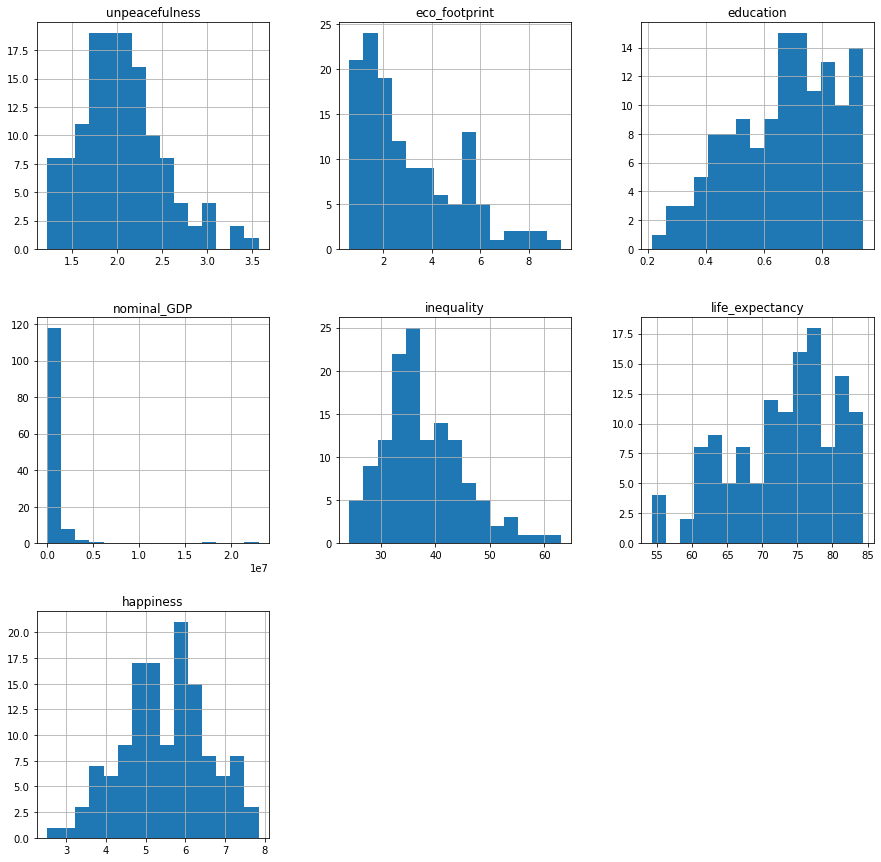

In [40]:
# let's see if the data has changed while scaling
data.hist(bins=15,figsize=(15,15));

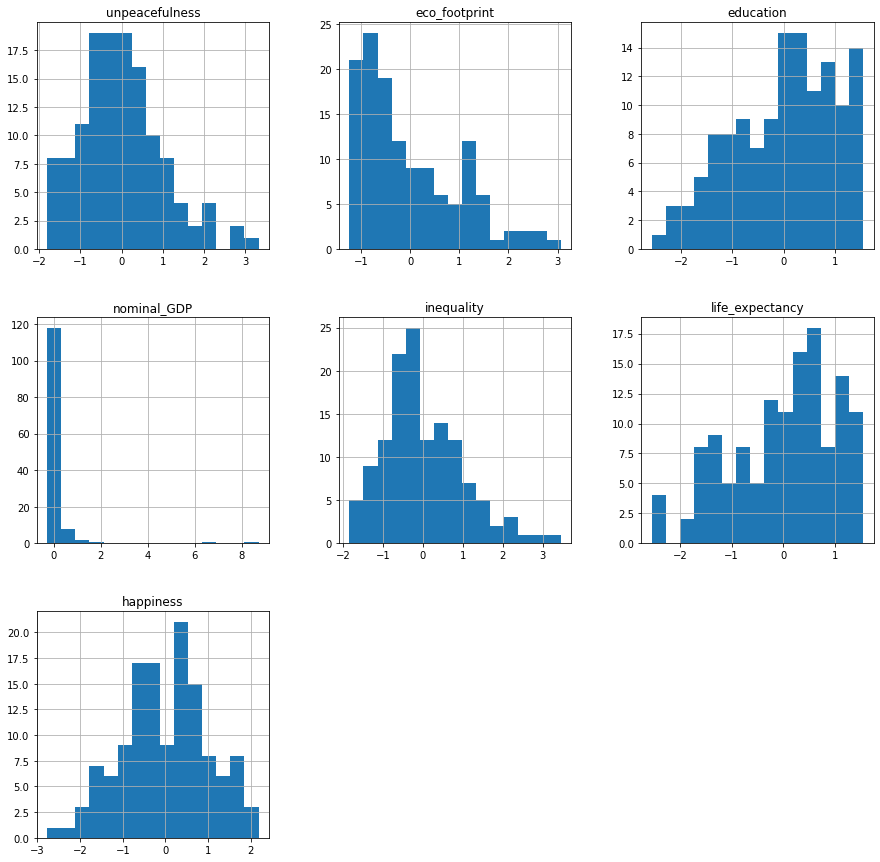

In [41]:
scaled.hist(bins=15,figsize=(15,15));

In [42]:
# they are unchanged, so we will continue
K_Means=KMeans(n_clusters=10,random_state=5)

In [43]:
clusters=K_Means.fit(scaled)

In [44]:
scaled['cluster']=clusters.labels_

In [45]:
scaled['cluster'].value_counts()

0    29
5    23
7    18
1    17
2    15
3     9
9     8
6     5
8     5
4     2
Name: cluster, dtype: int64

In [46]:
scaled.index=data.index

In [47]:
scaled

,unpeacefulness,eco_footprint,education,nominal_GDP,inequality,life_expectancy,happiness,cluster
country,,,,,,,,
New Zealand,-1.800968,1.230532,1.420779,-0.262354,-0.204465,1.177850,1.653810,1
Portugal,-1.685689,0.380057,0.522298,-0.173361,-0.532276,1.038941,0.398338,7
Austria,-1.648713,1.457984,1.051151,-0.083366,-1.092286,1.189426,1.645428,1
Denmark,-1.594337,1.186030,1.437839,-0.116518,-1.228874,1.109388,1.973267,1
Canada,-1.570411,2.501300,1.318420,0.518473,-0.600569,1.224153,1.491754,1
...,...,...,...,...,...,...,...,...
Pakistan,2.225071,-1.147832,-1.456635,-0.169433,-0.573252,-0.779467,-0.528365,8
Russia,2.270748,1.275033,0.937419,0.374005,-0.026901,0.008501,-0.022637,9
Iraq,2.871065,-0.608868,-0.757184,-0.193061,-1.119603,-0.327778,-0.602874,8


# Definitive clusters
## First we have to find the optimum number of clusters (K)

In [48]:
scaled=scaled.drop('cluster',axis=1)

In [49]:
K=range(2,25)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

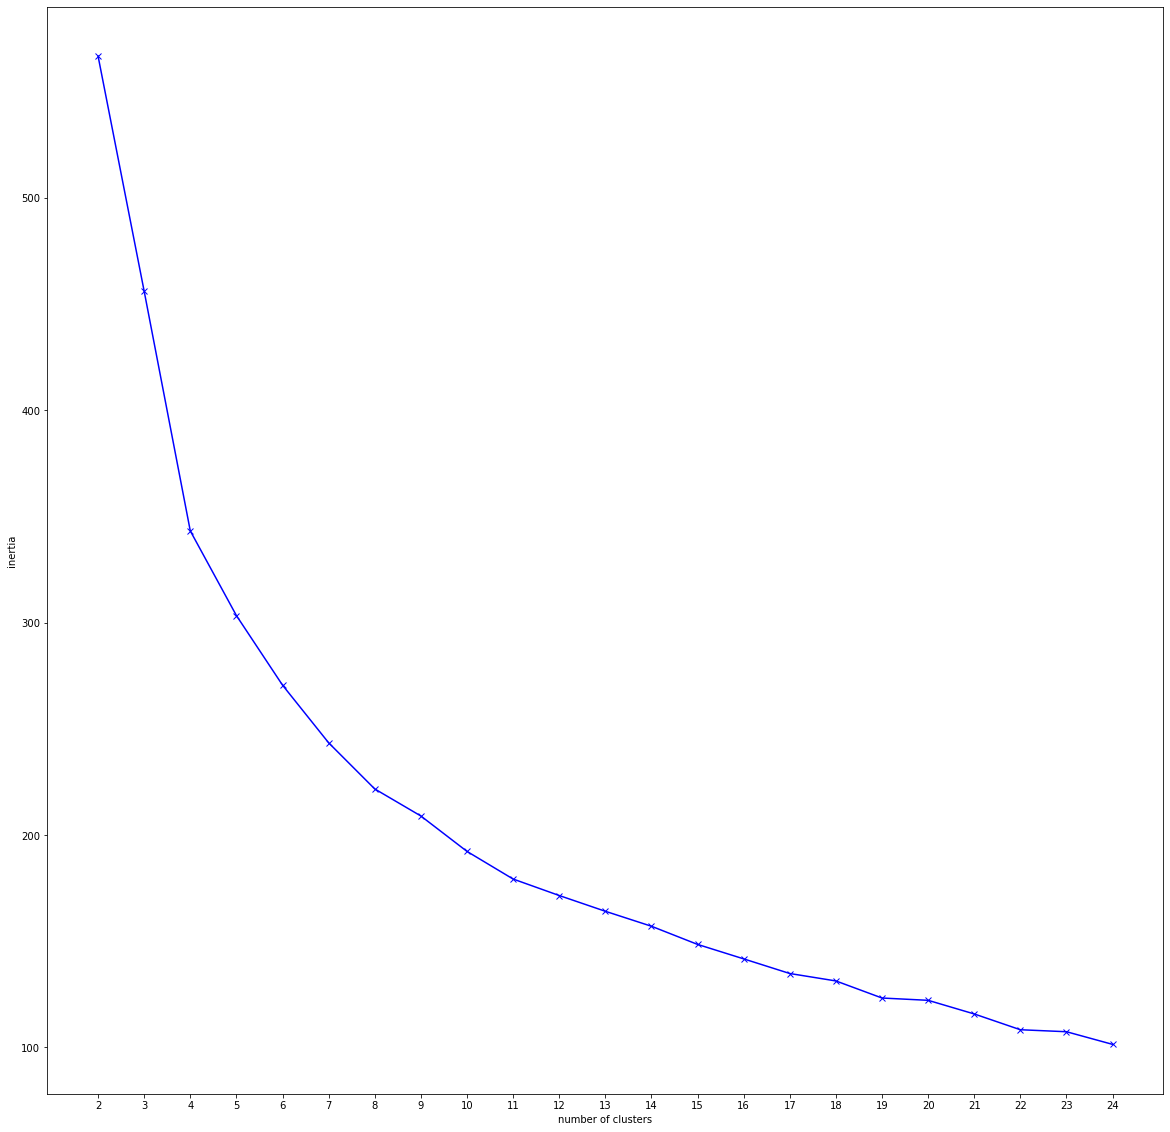

In [50]:
# let's see the elbow

plt.figure(figsize=(20,20))
plt.plot(K,inertia,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0));

# then again... it's not really clear where the elbow is. Could be 14 but it must be a much lower number for sure.

In [51]:
K=range(2,25)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(scaled)
    sil.append(silhouette_score(scaled,kmeans.predict(scaled)))

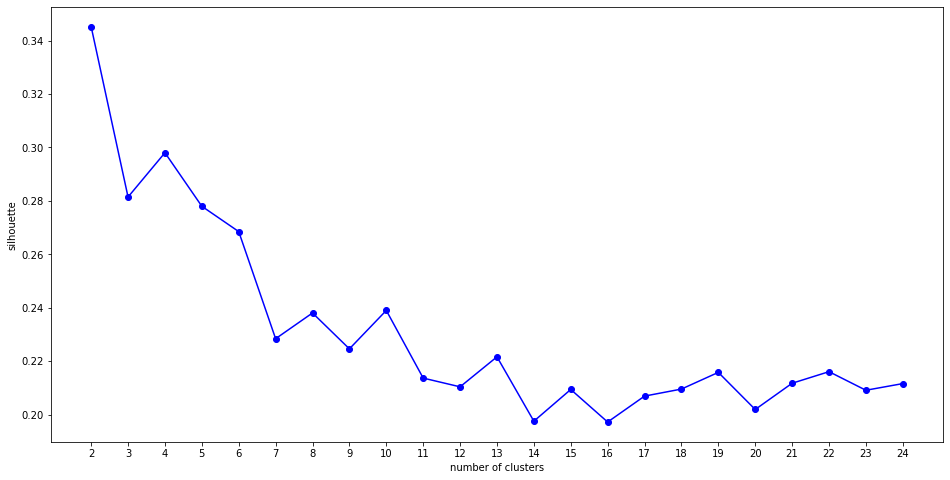

In [52]:
# and now, the silhouette score

plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('number of clusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0));

# now the correct number of clusters is 4

## Now we will apply the 4 clusters to the dataframe

In [53]:
kmeans=KMeans(n_clusters=4, random_state=5)

In [54]:
clusters=kmeans.fit(scaled)

In [55]:
scaled['cluster']=clusters.labels_

In [56]:
scaled.to_csv('scaled clusters no religion IW.csv')